# Facial Expression Recognition

# BDA 2023 | Competition 4 - Round 2 | Group 10

* [Section 1: Data Considerations](#section1)
* [Section 2: Data Import](#section2)
* [Section 3: Feature Extraction for Images](#section3)
    - [Section 3.1: Raw Pixel Analysis](#section3.1)
    - [Section 3.2: Statistical (Histogram) Features](#section3.2)
    - [Section 3.3: Statistical Spectral Features](#section3.3)
    - [Section 3.4: Histogram of Oriented Gradients (HOG) Features](#section3.4)
    - [Section 3.5: Creating a Full Feature Data Frame](#section3.5)
    - [Section 3.6: Cleaning Feature Data Frame](#section3.6)
    - [Section 3.7: Resulting Final Feature Data Frame](#section3.7)
    - [Section 3.8: New Train-Test Split](#section3.8)
* [4. Model Fitting](#section4)
    - [Section 4.1: Classification Tree](#section4.1)
    - [Section 4.2: Linear Discriminant Analysis with PCA (LDApca)](#section4.2)
    - [Section 4.3: Lasso-Fitted Multinomial Regression (LR)](#section4.3)
    - [Section 4.4: Ridge-Fitted Multinomial Regression (RR)](#section4.4)
    - [Section 4.5: Random Forests (RF)](#section4.5)
    - [Section 4.6: Support Vector Machines (SVMs)](#section4.6)
    - [Section 4.7: k-Nearest Neighbors (kNN)](#section4.7)
* [Section 5: Model Evaluations](#section5)
    - [Section 5.1: Classification and Regression Tree (CART)](#section5.1)
    - [Section 5.2: Linear Discriminant Analysis with PCA (LDApca](#section5.2)
    - [Section 5.3: Lasso-Fitted Multinomial Regression (LR)](#section5.3)
    - [Section 5.4: Ridge-Fitted Multinomial Regression (RR)](#section5.4)
    - [Section 5.5: Support Vector Machines (SVMs)](#section5.5)
    - [Section 5.6: k-Nearest Neighbors (kNN)](#section5.6)
* [Section 6: Final Model Selection](#section6)
    - [Section 6.1: Formatting Your Submission File](#section6.1)
* [Section 7: Contributions](#section7)

# 1. Data Considerations <a class="anchor"  id="section1"></a>

**Data Description and Goals**

Our goal is to train a model that accurately recognizes one of four emotions - anger, disgust, hapiness or sadness - from photos of people's faces. The data we have available to train this model on consists of gray scale photos cropped to snuggly fit only the face of one of the 101 participants expressing one of the four previously mentioned emotions. There are 2538 such images in the training set that have associated emotion labels validated by emotion researchers to compare the accuracy of our model against.

**1. Data Origin and Generalizability**

The dataset is sourced from the Cohn-Kanade (CK) AU-Coded Facial Expression Database and includes individuals aged 18 to 50 years who are actors. The majority of subjects (69%) are female, 81% Euro-American, 13% Afro-American, and 6% other groups.

The dataset is expected to provide reliable generalization for facial expressions in photos of individuals from a similar demographic. However, its performance may be somewhat less accurate when applied to Asian, Latino and Afro-American individuals compared to individuals of Caucasian descent. Additionally, all the participants are actors, whose facial expressions can be significanlty different than general population sampling.

Furthemore, the classes of prediction are four emotions: anger, disgust, happy, sadness. This implies that only these four empotions are examined and any more nuanced combinations have to be classified into one of these four categories.

**2. Candidate Machine Learning Methods (Models, Features)**

We are looking for models capable of classifying objects into one of four categories. These models must also handle a substantial number of predictors, as the input data consists of 48x48 pixel images, equating to 2304 data points per picture, besides additional predictors that will be used here.

This demand arises because facial expressions exhibit non-linear patterns. Nevertheless, linear models remain viable, contingent on the nature of computed features. If these features exhibit a linear relationship with the categorization of facial expressions, linear models can recognize this pattern. Therefore, we should consider both linear and non-linear models. It's worth noting that when assessing the performance of these models, we must do so within the context of the computed features.

Some models based on these criteria:

* Linear Discriminant Analysis (LDA)
* Lasso-fitted multinomial regression (LR)
* Ridge-fitted multinomial regression (RR)
* Random Forests (RF)
* Boosting (BS)
* Support Vector Machines (SVM)
* k-Nearest Neighbours (kNN)

**3. Bayes' Error Bound**

In the context of determining a lower bound on the Bayes bound, which represents the minimum achievable accuracy, it is valuable to consider the performance of the human brain as a benchmark for emotion recognition from facial expressions. The argument for using the human brain as a reference point stems from the unique attributes of human perception and understanding of emotions, which algorithms lack.

Humans possess a deep understanding of emotions and can analyze facial expressions holistically, taking into account various visual cues such as motion, orientation, and color. In contrast, machine learning models typically focus on isolated features without an inherent grasp of the subjective meaning behind these features. Furthermore, humans have personal experiences and emotions, which allow them to establish strong connections between expressions and feelings, a perspective that algorithms do not possess.

To estimate the Bayes bound for a given dataset, one can inquire about the accuracy of human judges in recognizing emotions. A study by Mollahosseini et al. (2018) provides insight into the inter-rater agreement among human judges for 11 different emotions, with specific accuracies for four of them:

* Disgust: 67.6%
* Anger: 62.3%
* Happy: 79.6%
* Sad: 69.7%

Considering this, the likely overall Bayes bound for this particular dataset is bound to be at least around 70%. This percentage represents a baseline against which machine learning models can be compared, with the expectation that they may perform even somewhat better given their ability to focus on features of human faces such as edges that human judgers cannot readily incorporate into their assessment of others' emotions.

There are several reasons we expect that machines will perform better in emotion recognition of human faces than humans do:

* **Lower non-relevant influencability**: Machines are not influenced by human factors like fatigue, mood, or distractions that can affect human accuracy (this can bias humans in emotion recognition as well as just generally decrease accuracy).

* **Scalability**: Machines can be easily scaled to process a large amount of data in a short time, this can help improve performance in real-time applications.

* **Objectivity**: Human judgments can be subjective and influenced by cultural, social, and personal biases.

* **Data-driven learning**: ML algorithms can benefit from massive datasets to learn and adapt continuously. This allows machines to improve their accuracy over time through exposure to a diverse range of facial expressions and emotions.

* **Feedback Loops ("Reinforcements")**: ML models can incorporate feedback from their mistakes, allowing them to refine their algorithms and improve accuracy over time.

* **Quantitative Evaluation**: ML can provide precise quantitative metrics for emotion recognition, making it easier to track and evaluate performance objectively.

As always, it's handy to evaluate how the algorithm does on the training set: If the training set is not classified accurately, how can you expect the test set to do any better. This obvious fact is often overlooked surprisingly.

# 2. Data Import <a class="anchor"  id="section2"></a>

First, we import the image data from the working directory in order to be able to compute features and train models on it.

In [1]:
# Importing packages
library(tidyverse) # metapackage with lots of helpful functions
library(png) # package that can be used to read png image files in a simple format
library(caret)

# Reading in files
list.files(path = "../input/")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




[1] "facial-expressions-bda-2023-round-2"

In [2]:
# Showing the available directories
dirs = dir("../input", pattern="[^g]$", recursive=TRUE, include.dirs = TRUE, full.names = TRUE)
dirs

[1] "../input/facial-expressions-bda-2023-round-2"                     
[2] "../input/facial-expressions-bda-2023-round-2/ckplus"              
[3] "../input/facial-expressions-bda-2023-round-2/ckplus/test"         
[4] "../input/facial-expressions-bda-2023-round-2/ckplus/train"        
[5] "../input/facial-expressions-bda-2023-round-2/ckplus/train/anger"  
[6] "../input/facial-expressions-bda-2023-round-2/ckplus/train/disgust"
[7] "../input/facial-expressions-bda-2023-round-2/ckplus/train/happy"  
[8] "../input/facial-expressions-bda-2023-round-2/ckplus/train/sadness"

In [3]:
# Getting all image files: file names ending ".png" 
anger   = dir(grep("anger",   dirs, value = TRUE), pattern = "png$", full.names = TRUE)
disgust = dir(grep("disgust", dirs, value = TRUE), pattern = "png$", full.names = TRUE)
happy   = dir(grep("happy",   dirs, value = TRUE), pattern = "png$", full.names = TRUE)
sad     = dir(grep("sad",     dirs, value = TRUE), pattern = "png$", full.names = TRUE)
test_im = dir(grep("test",    dirs, value = TRUE), pattern = "png$", full.names = TRUE)

str(anger)
str(disgust)
str(happy)
str(sad)
str(test_im)

 chr [1:570] "../input/facial-expressions-bda-2023-round-2/ckplus/train/anger/S010_004_00000018a.png" ...
 chr [1:744] "../input/facial-expressions-bda-2023-round-2/ckplus/train/disgust/S005_001_00000009a.png" ...
 chr [1:870] "../input/facial-expressions-bda-2023-round-2/ckplus/train/happy/S010_006_00000013a.png" ...
 chr [1:354] "../input/facial-expressions-bda-2023-round-2/ckplus/train/sadness/S011_002_00000020a.png" ...
 chr [1:1080] "../input/facial-expressions-bda-2023-round-2/ckplus/test/S010_004_00000017a.png" ...


# 3. Feature Extraction for Images <a class="anchor"  id="section3"></a>


Three are three approaches to feature extraction from images: 


1. **Raw pixel analysis**
    - Pixel intensities are used as features
    
    - Resizing images to reduce number of potential features (i.e., accounting for pixel correlations)

2. **Statistical approach (histograms)**

    - Descriptive statistics of the histograms:
        - Raw bin counts
        
        - Mean (per color channel)
        
        - Standard deviation
        
        - Shifted correlations (or inner product)
        
        - HoG features ("gradients): Histograms of Gradients, popular for detecting humans
        
        - Spectral measures
        
    - Key issues: scale, shift and *rotation* invariance, and intensity invariance
    - Especially useful for edge coordinates
    - Breaking up picture into patches
    - Akin the Frey-Slate features

## 3.1 Raw Pixel Analysis <a class="anchor"  id="section3.1"></a>

When working with image data, you often have many more Gigabytes of raw data than you have RAM memory available. Therefore, it is often not possible to work with all data "in memory". Resizing images often helps, but may cause loss of information.

The images for this competition are

- gray scale, so we need only one *color channel* 
- are only 48 by 48 pixels

Furthermore there are only 2538 pictures in the training set. Therefore, we are lucky enough to be able to retain all images in RAM, and don't have to do "special stuff" to handle reading in image files while fitting a model.

Reading in images pixelwise is easiest: We simply store each image as a long vector of pixel intensities, row by row. Also we will need a vector that contains the emotion label for each of the images.

In [4]:
# Combine all filenames into a single vector
train_image_files <- c(anger, happy, sad, disgust)

# Read in the images as pixel values (discarding color channels)
X <- sapply(train_image_files, function(nm) c(readPNG(nm)[, , 1])) %>% t()
y <- c(
  rep("anger", length(anger)),
  rep("happy", length(happy)),
  rep("sad", length(sad)),
  rep("disgust", length(disgust))
)

X_test <- sapply(test_im, function(nm) c(readPNG(nm)[, , 1])) %>% t()


# Change row and column names of X to something more managable (caret::train requires column names)
rownames(X) <- gsub(".+train/", "", rownames(X))
rownames(X_test) <- gsub(".+test/", "", rownames(X_test))

colnames(X) <- colnames(X_test) <- paste("p", 1:ncol(X), sep = "")

# Check result (are X, X_test, and y what we expect)
X[1:6, 20:23] %>% print()
table(y)
                 
# Call X X_train (handy for later)
X_train <- X
                 
X_test[1:6, 20:23] %>% print()

                                    p20        p21        p22        p23
anger/S010_004_00000018a.png 0.58039216 0.60784314 0.70196078 0.85882353
anger/S010_004_00000018b.png 0.02745098 0.02745098 0.04313725 0.07450980
anger/S010_004_00000018c.png 0.03529412 0.03137255 0.02745098 0.01960784
anger/S010_004_00000018d.png 0.03921569 0.03137255 0.03137255 0.02745098
anger/S010_004_00000018e.png 1.00000000 1.00000000 1.00000000 1.00000000
anger/S010_004_00000018f.png 1.00000000 1.00000000 1.00000000 1.00000000


y
  anger disgust   happy     sad 
    570     744     870     354 

                              p20        p21        p22        p23
S010_004_00000017a.png 0.77647059 0.81960784 0.89803922 0.98039216
S010_004_00000017b.png 0.46666667 0.52549020 0.63529412 0.74901961
S010_004_00000017c.png 0.25490196 0.34509804 0.49803922 0.67450980
S010_004_00000017d.png 0.04313725 0.03529412 0.03529412 0.02745098
S010_004_00000017e.png 0.03921569 0.03137255 0.03137255 0.02745098
S010_004_00000017f.png 0.07058824 0.10588235 0.14509804 0.24705882


In [5]:
# Merge X_train and X_test for the moment to compute features
X <- rbind(X_train, X_test)

# Save index of training data
train_index <- 1:nrow(X_train)

head(X)
ncol(X)
nrow(X)

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,⋯,p2295,p2296,p2297,p2298,p2299,p2300,p2301,p2302,p2303,p2304
anger/S010_004_00000018a.png,0.06666667,0.04705882,0.03529412,0.01960784,0.03137255,0.05490196,0.05882353,0.07450980,0.06666667,0.04705882,⋯,0.007843137,0.00000000,0.09019608,0.6,0.63921569,0.6392157,0.62745098,0.6156863,0.6156863,0.6117647
anger/S010_004_00000018b.png,0.06274510,0.07058824,0.07058824,0.05490196,0.03921569,0.03921569,0.03921569,0.04313725,0.04313725,0.04313725,⋯,1.000000000,1.00000000,1.00000000,1.0,1.00000000,1.0000000,1.00000000,1.0000000,1.0000000,1.0000000
anger/S010_004_00000018c.png,0.00000000,0.04705882,0.04705882,0.05882353,0.07058824,0.08235294,0.08627451,0.08627451,0.07450980,0.06666667,⋯,1.000000000,1.00000000,1.00000000,1.0,1.00000000,0.9960784,1.00000000,1.0000000,1.0000000,1.0000000
anger/S010_004_00000018d.png,1.00000000,0.94901961,0.02352941,0.04313725,0.02745098,0.02745098,0.03529412,0.02745098,0.03137255,0.04313725,⋯,1.000000000,1.00000000,1.00000000,1.0,1.00000000,1.0000000,1.00000000,1.0000000,1.0000000,0.9882353
anger/S010_004_00000018e.png,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,⋯,0.074509804,0.02352941,0.00000000,0.0,0.02352941,0.4509804,0.62745098,0.6274510,0.6235294,0.6117647
anger/S010_004_00000018f.png,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,⋯,0.094117647,0.07843137,0.03921569,0.0,0.00000000,0.0000000,0.02745098,0.5333333,0.6196078,0.6196078


[1] 2304

[1] 3618

## 3.2 Statistical (Histogram) Features <a class="anchor"  id="section3.2"></a>

### Statistical (histogram) features from edges
Images depicting a certain face are rarely identical; they often exhibit variations due to potential transformations like flipping, mirroring, or color alterations. To create features that remain robust in the face of such changes, we turn to "histogram features," which serve as statistical abstractions of various image attributes commonly shared among similar pictures. While it's possible to compute these histogram features using pixel data, they often yield superior results when applied to edges. Hence, our feature extraction approach centers on the edges, as the critical information lies in capturing abrupt light changes, also referred to as contrast. This indicates that features using edges can be quite useful for machine learning algorithms.

Frey and Slate type features: Histogram descriptives of the x and y locations of the 'on' pixels in the edge pixel maps. Descriptions were attained from here: https://link.springer.com/content/pdf/10.1007/BF00114162.pdf)
* **x.box**: The horizontal position.
* **y.box**: The verctical position.
* **width**: The width of the box.
* **height**: The height of the box.
* **onpix**: Number of pixels that are 'on' pixel.
* **x.bar**: The mean horizontal position of the pixels inside the box.
* **y.bar**: The mean vertical position of the pixels inside the box.
* **x2.bar**: The mean squared value of the horizontal pixel distances (spread of the box).
* **y2.bar**: The mean squared value of the vertical pixel distances.
* **xybar**: The mean product of the horizontal and vertical distances for each "on" pixel (positive value for diagonal lines that run from bottom left to top right and a negative value for diagonal lines from top left to bottom right).
* **x2y.bar**: Correlation of the horizontal variance with the vertical position of the box.
* **xy2.bar**: This measures the correlation of the vertical variance with the horizontal position.
* **x.ege**: The amount of edges in the box.
* **xegvy**: The sum of the vertical positions of edges encountered as measured in 13 above (higher value if there are more edges at the top of the box).
* **y.ege**: The mean number of edges encountered when making systematic scans of the image from bottom to top over all horizontal positions within the box.
* **yegvx**: The sum of horizontal positions of edges encountered as measured in 15 above.

All features computed this way have non-zero variance, and it is generally dificult to predict which features are highly correlated or multi-collinear.

Furthermore, **Mean, Standard Deviation, Skewness, Kurtosis and Entropy** will be used to evaluate edges (edge features).

**Entropy** is a measure of disorder, uncertainty, or randomness within a system.

In [6]:
# Entropy function to be used in "compute_edge_features"
entropy = function(x, nbreaks = nclass.Sturges(x)) {
    r = range(x)
    x_binned = findInterval(x, seq(r[1], r[2], len= nbreaks))
    h = tabulate(x_binned, nbins = nbreaks)
    p = h/sum(h)
    -sum(p[p>0] * log(p[p>0]))
}

In [7]:
## Created with Group 1's help from last year (2022)

# Loading FreySlateFeatures function
source("https://bit.ly/32um24j")

# Function to compute edge features
compute_edge_features <- function(X, threshold = 0.0625, summary = TRUE) {
    
    # Computes edge and histogram feature for one image
    edge <- function(x, summary) {
        x <- matrix(x, 48)
        output <- edges <- list()
        
        # Compute edges by differencing neighboring pixels
        edges[["edge_h"]] <- (x[-1,] - x[-nrow(x),])       # horizontal
        edges[["edge_v"]] <- (x[,-1] - x[,-ncol(x)])      # vertical
        edges[["edge_d1"]] <- (edges[["edge_h"]][,-1] - edges[["edge_h"]][,-ncol(edges[["edge_h"]])])     # h - v
        edges[["edge_d2"]] <- (edges[["edge_v"]][-1,] - edges[["edge_v"]][-nrow(edges[["edge_v"]]),])    # v - h
        
        # summary == TRUE; produce histogram features
        if (summary) {
            edges[["edge_h"]] <- edges[["edge_h"]] < threshold 
            edges[["edge_v"]] <- edges[["edge_v"]] < threshold 
            edges[["edge_d1"]] <- edges[["edge_d1"]] < threshold
            edges[["edge_d2"]] <- edges[["edge_d2"]] < threshold
            
            
            # Compute features; iterate through the edge types
            for (i in c("_h","_v","_d1","_d2")) {

                # Frey Slate Features
                output[[ paste0("fsf", i) ]] <- FreySlateFeatures(edges[[ paste0("edge", i) ]])

                # Mean
                output[[ paste0("m", i) ]] <- mean(edges[[ paste0("edge", i) ]])

                # SD
                output[[ paste0("sd", i) ]] <- sd(edges[[ paste0("edge", i) ]])

                # Skew
                output[[ paste0("ske", i) ]] <- e1071::skewness(edges[[ paste0("edge", i) ]])

                # Kurtosis
                output[[ paste0("kur", i) ]] <- e1071::kurtosis(edges[[ paste0("edge", i) ]])

                # entropy
                output[[ paste0("entropy", i) ]] <- entropy(edges[[ paste0("edge", i) ]])
            }
            
            return(unlist(output))
            
            
        # summary == FALSE; only return edges
        } else {
            
            return(unlist(edges))
        }

    }
    
    # Get edges/summary for all images
    edges <- apply(X, 1, edge, summary = summary)
    
    
    
    # Transpose to get row=image, column=feature matrix
    return(t(edges))
}

# Computing the features

X_features <- compute_edge_features(X)
X_features <- cbind(X, X_features)

head(X_features)
colnames(X_features)

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,⋯,fsf_d2.xy2bar,fsf_d2.x.ege,fsf_d2.xegvy,fsf_d2.y.ege,fsf_d2.yegvx,m_d2,sd_d2,ske_d2,kur_d2,entropy_d2
anger/S010_004_00000018a.png,0.06666667,0.04705882,0.03529412,0.01960784,0.03137255,0.05490196,0.05882353,0.07450980,0.06666667,0.04705882,⋯,1.757724,14.86111,16.71797,12.66667,21.17248,0.9293798,0.2562473,-3.349775,9.225167,0.2552402
anger/S010_004_00000018b.png,0.06274510,0.07058824,0.07058824,0.05490196,0.03921569,0.03921569,0.03921569,0.04313725,0.04313725,0.04313725,⋯,1.757750,12.50000,21.38298,11.51163,18.96560,0.9298325,0.2554869,-3.363287,9.315917,0.2540720
anger/S010_004_00000018c.png,0.00000000,0.04705882,0.04705882,0.05882353,0.07058824,0.08235294,0.08627451,0.08627451,0.07450980,0.06666667,⋯,1.757751,11.55556,19.14894,11.93182,19.84835,0.9320960,0.2516381,-3.432710,9.787932,0.2481833
anger/S010_004_00000018d.png,1.00000000,0.94901961,0.02352941,0.04313725,0.02745098,0.02745098,0.03529412,0.02745098,0.03137255,0.04313725,⋯,1.757746,11.66667,15.36668,11.00000,17.86555,0.9388864,0.2395929,-3.661943,11.414995,0.2300208
anger/S010_004_00000018e.png,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,⋯,1.757717,15.28571,15.99819,13.06818,21.53237,0.9284744,0.2577591,-3.323107,9.047134,0.2575674
anger/S010_004_00000018f.png,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,⋯,1.757722,11.96970,11.50294,11.25000,17.54640,0.9443187,0.2293572,-3.872716,13.003815,0.2149153


[1] "p1"            "p2"            "p3"            "p4"           
   [5] "p5"            "p6"            "p7"            "p8"           
   [9] "p9"            "p10"           "p11"           "p12"          
  [13] "p13"           "p14"           "p15"           "p16"          
  [17] "p17"           "p18"           "p19"           "p20"          
  [21] "p21"           "p22"           "p23"           "p24"          
  [25] "p25"           "p26"           "p27"           "p28"          
  [29] "p29"           "p30"           "p31"           "p32"          
  [33] "p33"           "p34"           "p35"           "p36"          
  [37] "p37"           "p38"           "p39"           "p40"          
  [41] "p41"           "p42"           "p43"           "p44"          
  [45] "p45"           "p46"           "p47"           "p48"          
  [49] "p49"           "p50"           "p51"           "p52"          
  [53] "p53"           "p54"           "p55"           "p56"          
  [57] "p57"           "p58"           "p59"           "p60"          
  [61] "p61"           "p62"           "p63"           "p64"          
  [65] "p65"           "p66"           "p67"           "p68"          
  [69] "p69"           "p70"           "p71"           "p72"          
  [73] "p73"           "p74"           "p75"           "p76"          
  [77] "p77"           "p78"           "p79"           "p80"          
  [81] "p81"           "p82"           "p83"           "p84"          
  [85] "p85"           "p86"           "p87"           "p88"          
  [89] "p89"           "p90"           "p91"           "p92"          
  [93] "p93"           "p94"           "p95"           "p96"          
  [97] "p97"           "p98"           "p99"           "p100"         
 [101] "p101"          "p102"          "p103"          "p104"         
 [105] "p105"          "p106"          "p107"          "p108"         
 [109] "p109"          "p110"          "p111"          "p112"         
 [113] "p113"          "p114"          "p115"          "p116"         
 [117] "p117"          "p118"          "p119"          "p120"         
 [121] "p121"          "p122"          "p123"          "p124"         
 [125] "p125"          "p126"          "p127"          "p128"         
 [129] "p129"          "p130"          "p131"          "p132"         
 [133] "p133"          "p134"          "p135"          "p136"         
 [137] "p137"          "p138"          "p139"          "p140"         
 [141] "p141"          "p142"          "p143"          "p144"         
 [145] "p145"          "p146"          "p147"          "p148"         
 [149] "p149"          "p150"          "p151"          "p152"         
 [153] "p153"          "p154"          "p155"          "p156"         
 [157] "p157"          "p158"          "p159"          "p160"         
 [161] "p161"          "p162"          "p163"          "p164"         
 [165] "p165"          "p166"          "p167"          "p168"         
 [169] "p169"          "p170"          "p171"          "p172"         
 [173] "p173"          "p174"          "p175"          "p176"         
 [177] "p177"          "p178"          "p179"          "p180"         
 [181] "p181"          "p182"          "p183"          "p184"         
 [185] "p185"          "p186"          "p187"          "p188"         
 [189] "p189"          "p190"          "p191"          "p192"         
 [193] "p193"          "p194"          "p195"          "p196"         
 [197] "p197"          "p198"          "p199"          "p200"         
 [201] "p201"          "p202"          "p203"          "p204"         
 [205] "p205"          "p206"          "p207"          "p208"         
 [209] "p209"          "p210"          "p211"          "p212"         
 [213] "p213"          "p214"          "p215"          "p216"         
 [217] "p217"          "p218"          "p219"          "p220"         
 [221] "p221"          "p222"          "p223"          "p224"         
 [225] "p225"          "p22

## 3.3 Statistical Spectral Features <a class="anchor"  id="section3.3"></a>

For the spectral and statistical features we were told we can use most of the features used to classify phone sensor signals. In line with that notebook we first  have to transform the data to a long format. After this we make all sorts of statistical and spectral calculations. Finally, we end up with a dataframe where all the pictures are in each row and all the statistical and spectral features are added as columns. 

We'll use:
- **Mode**: Returns the value that has the highest occurrence count within a given set of values.

- **Power**: The mean of the row to the power of 2.

- **Entropy**: It measures the amount of uncertainty in a set of data or a probability distribution, therefore quantifies the unpredictability of the outcomes in a dataset. Overall, it returns the amount of information present (Grasman, 2018).

- **Energy**: Returns the “total power” of a signal in n samples (Grasman, 2018).

- **Lagged Correlation**: It measures the correlation between two time series variables with a time delay or lag between them. In other words, lagged correlations explore how one variable is related to another when there is a temporal offset between their observations (Grasman, 2018).

- **Spectral Entropy**: Returns the etropy of a spectrum, quantifying the amount of spectral information. It measures how uniformly the power or energy of a signal is distributed across different frequency components (randomness of frequency components in a signal) (Grasman, 2018).

- **Spectral Peak**: Returns the frequency component that has the highest amplitude or power (mean of the row to the power of 2).

- **Spectral Mean**: Returns the central tendency of the frequency components in a signal's spectrum (Grasman, 2018).

- **Spectral SD**: Returns the spread or variability of spectral amplitudes (Grasman, 2018).

We also considered the following spectral features, however, we did not find them to imrpove the accuracy of our predictions and therefore did not include them in the final model:
- **Mean**: Returns the average value of the dataset.

- **Median**: Returns the value which lies in the middle of the dataset.

- **Standard deviation**: It measures the dispersion of the data around the mean. Low values indicate tightly clusted datasets while high values indicate highly spread out datasets.

- **Variance**: Another measure of dispersion, it returns the average squared deviation of the values in the dataset from the mean.

- **Minimum**: Returns the smallest value within the dataset.

- **Maximum**: Returns the largest value within the dataset.

- **Range**: Returns the difference between the largest and the smallest value within the dataset.

- **First quantile**: Returns the value under which 25% of the dataset fall when arranged in increasing order.

- **Third quantile**: Returns the value under which 75% of the dataset fall when arranged in increasing order.

- **Skewness**: Measures the degree of asymmetry in the probability distribution of values within the dataset.

- **Kurtosis**: Measures the tailedness of the distribution of variables in the dataset. This indicates how often outliers occur.

- **Spectral Mode**: Returns the frequency component that occurs most often within a signal's spectrum.

- **Spectral Median**: Returns the frequency component that lies in the middle of the dataset capturing the signal's spectrum.

- **Spectral Kurtosis**: Returns the tailedness of the distribution of the data capturing the signal's spectrum. This indicates how often outliers occur in the dataset.

In [8]:
# For training set
X_n = as_tibble(X, rownames = "id")

# Cast to long format
X_nl = X_n %>%
    pivot_longer(-id, names_to = "px_pos", values_to = "px_value")

In [9]:
# Mode
most_common_value <- function(x) {
  if (!is.numeric(x)) {
    stop("Input vector must be numeric")
  }
  counts <- table(x, useNA = "no")
  most_frequent_idx <- which.max(counts)
  most_frequent_value <- as.numeric(names(counts)[most_frequent_idx])
  return(most_frequent_value)
}

# Power
power <- function(x) {
    result <- mean(x^2)
    return(result)
}

# Entropy
entropy <- function(x, nbreaks = 10) {
    r <- range(x)
    x_binned <- findInterval(x, seq(r[1], r[2], len = nbreaks))
    h <- tabulate(x_binned, nbins = nbreaks) # fast histogram
    p <- h / sum(h)
    result <- -sum(p[p > 0] * log(p[p > 0]))
    return(result)
}

# Energy
energy <- function(x) {
    sum(x^2)
}

# Lagged correlation
lagged_cor <- function(x, y = x, lag = 0) {
  # compute correlation between x and a time shifted y
  r_lagged <- cor(x, dplyr::lag(y, lag), use = "pairwise")
  return(r_lagged)
}

# Spectral entropy function
sp_entropy <- function(x) {
  spec <- spectrum(x, plot = FALSE)$spec
  entropy(spec)
}

# Spectral peak function
sp_peak <- function(x) {
  spec <- spectrum(x, plot = FALSE)
  return(spec$freq[which.max(spec$spec)])
}

# Spectral mean function
sp_mean <- function(x) {
  spec <- spectrum(x, plot = FALSE)
  df <- spec$freq[2] - spec$freq[1]
  return(sum(spec$freq * spec$spec * df))
}

# Spectral standard deviation function
sp_sd <- function(x) {
  spec <- spectrum(x, plot = FALSE)
  df <- spec$freq[2] - spec$freq[1]
  return(sqrt(sum((spec$freq - sp_mean(x))^2 * spec$spec * df)))
}

# Spectral mode function
sp_mode <- function(x) {
    spec <- spectrum(x, plot = FALSE)
    mode <- max(spec$spec)
    return(mode)
}

Now that all the different functions have been defined its time to add them all together. The function stat_spec_ft combines all the previously defined statistical and spectral fuctions and gives a dataframe where each row has one value and each column one of the statistical/spectral features. 

In [10]:
stat_spec_ft = function (pictures) {
  pictures %>%
    group_by(id) %>%
    summarise(   
      # Mode
      most_common_value = most_common_value(px_value),
        
      # Power
      power = power(px_value),
        
      # Entropy
      entropy = entropy(px_value),
        
      # Energy
      energy = energy(px_value),
        
      # Lagged correlations
      lagged_cor = lagged_cor(px_value),
        
      # Spectral entropy
      sp_entropy = sp_entropy(px_value),
        
      # Spectral peak
      sp_peak = sp_peak(px_value),
        
      # Spectral mean
      sp_mean = sp_mean(px_value),
            
      # Spectral standard deviation
      sp_sd = sp_sd(px_value)
    )
}

X_features_2 <- stat_spec_ft(X_nl)
X_features_2 %>% head()

id,most_common_value,power,entropy,energy,lagged_cor,sp_entropy,sp_peak,sp_mean,sp_sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S010_004_00000017a.png,0,0.1632724,1.962549,376.1797,1,0.11245754,0.0004340278,0.001483003,0.01357468
S010_004_00000017b.png,1,0.2319805,2.082901,534.4830,1,0.08062291,0.0416666667,0.002930787,0.02239665
S010_004_00000017c.png,1,0.2190641,2.053050,504.7238,1,0.12821622,0.0004340278,0.002707822,0.02088621
S010_004_00000017d.png,1,0.2272147,2.062124,523.5026,1,0.09793680,0.0004340278,0.002736302,0.02512135
S010_004_00000017e.png,1,0.2491569,2.088674,574.0575,1,0.13730928,0.0004340278,0.002813014,0.02082563
S010_004_00000017f.png,0,0.1992154,2.060656,458.9923,1,0.12172306,0.0416666667,0.002190686,0.01887423


## 3.4 Histogram of Oriented Gradient (HOG) Features <a class="anchor"  id="section3.4"></a>


**Histogram of Oriented Gradient (HOG)** is frequently used to process images. Similarly to the edge features it also focuses only on a certain set of highly informative characteristics of the image. HOG contains the distribution of gradients within an image and therefore allows us to find where neighboring pixels differ significantly. This helps us identify the direction of edges within the images. In summary, the process of extracting histogram of oriented gradient features has 5 steps:

1. **Feature Extraction**: it tries to capture the distribution of edge/gradient directions in small regions of the image.

2. **Gradient Computation**: the image is divided into a grid of cells and the local gradient information (horizontal and vertical gradients, gradient magnitude, gradient direction) is calculated for each.

3. **Histogram Creation**: for each cell a histogram of gradient orientations is constructed which capture the distribution of edge directions in the cell. 

4. **Normalization**: the histograms usually get normalized within a block of cells.

5. **Descriptor Formation**: HOG descriptor is finalized by concatenating the normalized histograms from all cells within a block or region of interest. 

Inspired by *Team 1* from last year we extracted the Histogram of Oriented Gradient (HOG) features:

We start by converting a dataframe with an image per row into a list of pixel matrixes for each image


In [11]:
format_matrices = function(image_matrix, col = 48, row = 48) {
  
  image_pixels = list()
  
  for(i in 1:nrow(image_matrix)) {
    
    # Extract pixel matrix for each image
    image_pixels[[i]] = image_matrix[i, ] %>% matrix(ncol = col, nrow = row) 
  }
  return(image_pixels)
}

dim(format_matrices(X)[[1]])

[1] 48 48

Here we take the 48x48 pixel matrices created in the previous step and calculate their horizontal and vertical gradients, their gradient magnitude and gradient direction.

In [12]:
get_gradients = function(formatted_matrices, size = 48) {   

  add_zeros_column = matrix(rep(0, size), ncol = 1)
  add_zeros_row = matrix(rep(0, size), nrow = 1)
  x_gradient = y_gradient = list()
  
  for(i in 1:length(formatted_matrices)) {
    
    # Calculate x gradient
    removed_column = formatted_matrices[[i]][,-size]
    x_gradient[[i]] = formatted_matrices[[i]] - cbind(add_zeros_column, removed_column)
  
    # Calculate y gradient
    removed_row = formatted_matrices[[i]][-1, ]
    y_gradient[[i]] = formatted_matrices[[i]] - rbind(removed_row, add_zeros_row)
    
  }
  return(list(x = x_gradient, y = y_gradient))
}

Here we calculate gradient magnitudes and direction


In [13]:
gradient_magnitude = function(x_gradient, y_gradient) {
  
  magnitude = list()
  
  for(i in 1:length(x_gradient)) {
    
    magnitude[[i]] = sqrt(x_gradient[[i]]^2 + y_gradient[[i]]^2)
  }
  return(magnitude)
}

# Calculate gradient direction
gradient_angle = function(x_gradient, y_gradient) {
  
  radian = angle = list()
  
  # loop over images
  for(i in 1:length(x_gradient)) {
    
    # atan() returns the radian
    radian[[i]] = atan(y_gradient[[i]] / x_gradient[[i]])
    
    # Replace NaNs with 0
    radian[[i]][is.na(radian[[i]])] = 0
    
    # Conversion to degree: 1 radian = 180/pi (wikipedia)
    angle[[i]] = radian[[i]] * (180/pi)
    
    # Add 180 to all pixels < 0
    index = angle[[i]] < 0
    angle[[i]][index] = angle[[i]][index] + 180
  }
  return(angle)
}

We will now visualize the gradient features that we have calculated in the previous step. This helps us both check that our functions have done what they were supposed and more intuitively understand the process of calculating the HOG features.

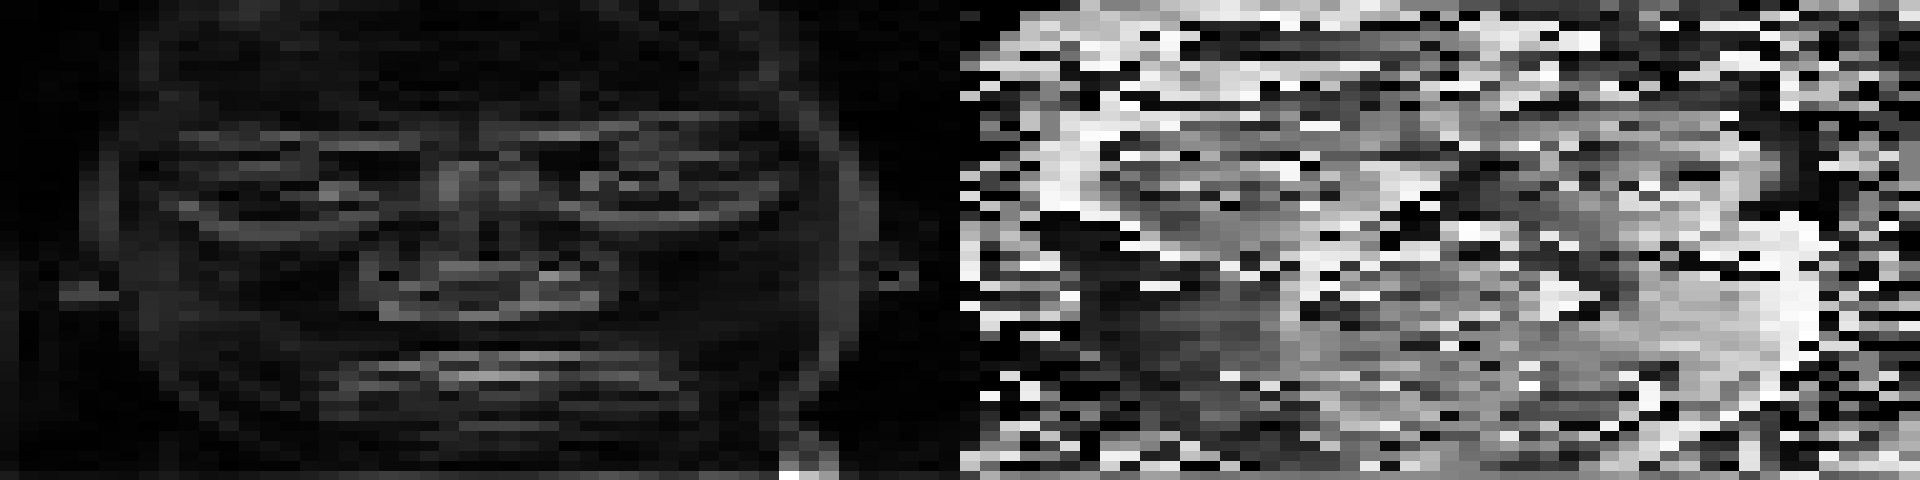

In [14]:
# Visualization utility function (from Raoul)
as_image <- function(x, nr=sqrt(length(x))) {opar=par(mar=rep(0,4)); on.exit(par(opar)); image(t(matrix(x,nr))[,nr:1], col = gray(0:255/255),axes=F)}

# Visualize the magnitude and direction pixel matrices
image_matrices = format_matrices(X)
x_gradient = get_gradients(image_matrices)$x
y_gradient = get_gradients(image_matrices)$y

options(repr.plot.width=4*4, repr.plot.height=4)
layout(t(1:2))
as_image(gradient_magnitude(x_gradient, y_gradient)[[55]]) # right
as_image(gradient_angle(x_gradient, y_gradient)[[55]])     # left

Next, we move on to creating a funciton which calculates the HOG features for smaller areas of the images. For this, it first has to split the images into blocks of 4 by 4 pixels. It then gets the previously calculated gradient features for each of these smaller blocks and returns them as a vector.

In [15]:
# Compute the list of HOG feature vectors for 4x4 blocks

get_HOGs_of_blocks = function(angle_matrix, magnitude_matrix) {
  
  upper_limit = seq(20, 160, 20)
  lower_limit = seq(0, 140, 20)
  column = list()
  row_blocks = list()
  
  # Separate image into blocks
  pixels = seq(0, 44, by = 4)
  
  # Loop over columns in 4*4 blocks
  for(c in pixels){
    
    # Loop over rows in 4*4 blocks
    for(r in pixels){ 
      
      angle_block = angle_matrix[(r + 1):(r + 4), (c + 1):(c + 4)]
      magnitude_block = magnitude_matrix[(r + 1):(r + 4), (c + 1):(c + 4)]
      
      # Because the intervals are closed to the right the last break point is set 
      # manually so that values of 180 are included
      bin_index = cut(angle_block, breaks = c(seq(0, 160, 20), 181), 
                       right = FALSE, labels = FALSE)
      bin_index_matrix = matrix(bin_index, 4, 4)
      
      # The bins are emptied for every matrix
      bin = numeric()
      
      for(j in 1:9){
        
        # Special case bin 9
        if(j == 9){
          
          # sum(magnitude_vector * ((180 - angle_vector) / 20))
          bin[j] = sum(c(magnitude_block[bin_index_matrix == j]) * 
                    ((180 - c(angle_block[bin_index_matrix == j])) / 20))
          
          # bin_content + sum(magnitude_vector * ((angle_vector - 0) / 20))
          bin[1] = bin[1] + sum(c(magnitude_block[bin_index_matrix == j]) * 
                    ((c(angle_block[bin_index_matrix == j]) - 0)/20))# 0 or 160?
          
          row_blocks[[which(pixels == r)]] <- bin
          column[[which(pixels == c)]] <- row_blocks
              }
        
        # sum(magnitude_vector * ((upper_limit - angle_vector)/20))
        bin[j] = sum(c(magnitude_block[bin_index_matrix == j]) * 
                  ((upper_limit[j] - c(angle_block[bin_index_matrix == j])) /
                  20))
        
        
        # sum(magnitude_vector * ((angle_vector - lower_limit)/20))
        bin[j + 1] = sum(c(magnitude_block[bin_index_matrix == j]) * 
                      ((c(angle_block[bin_index_matrix == j]) - lower_limit[j]) 
                       / 20))
      }
    }
  }
  return(column)
}

We also have to create a function which will then concatenate these vectors representing different 4x4 blocks belonging to the same image into one object.

In [16]:
# Normalized HOG vectors of one image matrix
concatenate_block_HOGs = function(blocks) {
  
  concatenated_columns = concatenated_all = list()
  
  # Loop over column
  for(i in 1:11) {
    
    # Loop over row
    for(j in 1:11){
      
      concatenated_columns[[j]] = unlist(as.vector(c(blocks[[i]][j], blocks[[i]][j + 1],
                                                 blocks[[i + 1]][j], blocks[[i + 1]][j + 1])))
    }
    concatenated_all[[i]] = concatenated_columns
  }
  return(concatenated_all)
}

Finally, we combine all of the functions we have created into one big function that we can pass our training data to and it will output a matrix of HOG features for all of the images in this dataset. We then apply this big function to our particular training set.

In [17]:
#  Build final function
HOG_features <- function(train_data){
  
  HOGs_feature_matrix = matrix(0, nrow(train_data), 4356)
  
  # Get all image matrices in the right format
  image_matrices = format_matrices(train_data)
  
  # Get x & y gradients
  x_gradient = get_gradients(image_matrices)$x
  y_gradient = get_gradients(image_matrices)$y
  
  angle_matrix = gradient_angle(x_gradient, y_gradient)
  magnitude_matrix = gradient_magnitude(x_gradient, y_gradient)
  
  
  for(i in 1:nrow(train_data)) { 
    
    HOGs = get_HOGs_of_blocks(angle_matrix[[i]], magnitude_matrix[[i]])
    
    HOG_feature = concatenate_block_HOGs(HOGs)
    
    HOGs_feature_matrix[i,] = matrix(unlist(HOG_feature), 1, 4356)
      
  }
  
  return(as.data.frame(HOGs_feature_matrix))
  
}

In [18]:
# Apply function to data
X_features_3 <- HOG_features(X)

# Check for NA values
any(is.na(X_features_3)) #`FALSE` = no NAs present

# Inspect data frame
head(X_features_3); dim(X_features_3)

[1] FALSE

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V4347,V4348,V4349,V4350,V4351,V4352,V4353,V4354,V4355,V4356
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.1753774,0.048642263,0.000000000,0.001309681,0.007843137,0.01290593,0.000000000,0.03874300,0.06815417,1.3522920,⋯,0.22643470,0.004891986,0.01767145,0.00521754,0.03021610,1.295366,0.0000000,0.00000000,0.00000000,0.00000000
2,1.3976058,0.005890482,0.000000000,0.001309681,0.000000000,0.00000000,0.002772968,0.05067974,0.06794914,1.0493726,⋯,0.00000000,0.184313725,0.00000000,0.00000000,0.00000000,2.022485,0.0000000,0.00000000,0.00000000,0.00000000
3,2.2868035,0.000000000,0.000000000,0.001309681,0.058823529,0.00000000,0.052418715,0.07589169,0.19331534,2.8188558,⋯,0.01123473,0.242026578,0.00000000,0.00000000,0.00000000,2.000000,0.0000000,0.00000000,0.00000000,0.02276161
4,0.9903704,0.000000000,1.055322702,0.000000000,1.234158975,0.00000000,0.000000000,0.06066135,0.01134763,0.5759234,⋯,0.04498204,1.048827838,0.03694474,0.00782631,0.52104717,1.101550,0.0000000,0.00000000,0.01253512,0.00000000
5,21.1078113,0.000000000,0.000000000,0.000000000,1.423529412,0.00000000,0.000000000,0.00000000,0.11274206,16.3275997,⋯,0.00000000,2.093298350,0.00000000,0.00260877,0.01706445,1.260663,0.1892281,0.01707658,0.00000000,0.11284056
6,20.6265717,0.000000000,0.008318903,0.003263109,0.925909192,0.00000000,0.000000000,0.00000000,0.32658565,17.3589660,⋯,0.00000000,1.629143687,0.00000000,0.00000000,0.00000000,1.729981,0.6522614,0.17142340,0.12841031,0.17112145


[1] 3618 4356

## 3.5 Creating a Full Feature Data Frame <a class="anchor"  id="section3.5"></a>

Now we combine all of the above created features into one data frame.

In [19]:
# Merging all resulting feature sets
features_df <- cbind(X_features, X_features_2, X_features_3)
features_df %>% head()

nrow(X_features)
nrow(X_features_2)
nrow(X_features_3)
ncol(X_features)
ncol(X_features_2)
ncol(X_features_3)

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,⋯,V4347,V4348,V4349,V4350,V4351,V4352,V4353,V4354,V4355,V4356
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
anger/S010_004_00000018a.png,0.06666667,0.04705882,0.03529412,0.01960784,0.03137255,0.05490196,0.05882353,0.07450980,0.06666667,0.04705882,⋯,0.22643470,0.004891986,0.01767145,0.00521754,0.03021610,1.295366,0.0000000,0.00000000,0.00000000,0.00000000
anger/S010_004_00000018b.png,0.06274510,0.07058824,0.07058824,0.05490196,0.03921569,0.03921569,0.03921569,0.04313725,0.04313725,0.04313725,⋯,0.00000000,0.184313725,0.00000000,0.00000000,0.00000000,2.022485,0.0000000,0.00000000,0.00000000,0.00000000
anger/S010_004_00000018c.png,0.00000000,0.04705882,0.04705882,0.05882353,0.07058824,0.08235294,0.08627451,0.08627451,0.07450980,0.06666667,⋯,0.01123473,0.242026578,0.00000000,0.00000000,0.00000000,2.000000,0.0000000,0.00000000,0.00000000,0.02276161
anger/S010_004_00000018d.png,1.00000000,0.94901961,0.02352941,0.04313725,0.02745098,0.02745098,0.03529412,0.02745098,0.03137255,0.04313725,⋯,0.04498204,1.048827838,0.03694474,0.00782631,0.52104717,1.101550,0.0000000,0.00000000,0.01253512,0.00000000
anger/S010_004_00000018e.png,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,⋯,0.00000000,2.093298350,0.00000000,0.00260877,0.01706445,1.260663,0.1892281,0.01707658,0.00000000,0.11284056
anger/S010_004_00000018f.png,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,⋯,0.00000000,1.629143687,0.00000000,0.00000000,0.00000000,1.729981,0.6522614,0.17142340,0.12841031,0.17112145


[1] 3618

[1] 3618

[1] 3618

[1] 2388

[1] 10

[1] 4356

## 3.6 Cleaning Feature Data Frame <a class="anchor"  id="section3.6"></a>

### Removing Near Zero Variances

Filtering out features that do not (or hardly) differ between all observations. Although caret::nearZeroVar is useful, LDA seemed to still experience problems due to near-zero variances in the data. Therefore, we remove near-zero variance manually.

In [20]:
# Converting matrix into a tibble
features <- features_df %>%
    as_tibble 

NearZeroVar <- function(data, threshold) {
    # Find features with near zero variance
    nzv <- data %>%
        summarise_if(is.numeric, var, na.rm = TRUE)
    
    # Features with nzv
    is_nzv <- nzv < threshold
    
    # Some features have NaN variance and must be removed manually
    is_nzv[is.na(is_nzv)] <- TRUE
    
    nzv <- colnames(nzv)[is_nzv] 
    
    return(nzv)
}

# Removing near zero variance features
features_nzv <- features %>%
    select(-all_of(NearZeroVar(features, .01)))

# Removing "id" for further processing
features_nzv <- features_nzv[, -which(names(features_nzv) == "id")]

head(features_nzv)
head(features_df)

p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,⋯,V4338,V4339,V4343,V4347,V4348,V4350,V4351,V4352,V4353,V4356
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.06666667,0.04705882,0.03529412,0.01960784,0.03137255,0.05490196,0.05882353,0.07450980,0.06666667,0.04705882,⋯,0.00000000,3.37830770,0.41753984,0.22643470,0.004891986,0.00521754,0.03021610,1.295366,0.0000000,0.00000000
0.06274510,0.07058824,0.07058824,0.05490196,0.03921569,0.03921569,0.03921569,0.04313725,0.04313725,0.04313725,⋯,0.25888500,1.80784314,0.00000000,0.00000000,0.184313725,0.00000000,0.00000000,2.022485,0.0000000,0.00000000
0.00000000,0.04705882,0.04705882,0.05882353,0.07058824,0.08235294,0.08627451,0.08627451,0.07450980,0.06666667,⋯,0.00000000,3.89933083,0.27674859,0.01123473,0.242026578,0.00000000,0.00000000,2.000000,0.0000000,0.02276161
1.00000000,0.94901961,0.02352941,0.04313725,0.02745098,0.02745098,0.03529412,0.02745098,0.03137255,0.04313725,⋯,0.00000000,3.43226629,0.27584612,0.04498204,1.048827838,0.00782631,0.52104717,1.101550,0.0000000,0.00000000
1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,⋯,0.09052695,0.00000000,0.50015522,0.00000000,2.093298350,0.00260877,0.01706445,1.260663,0.1892281,0.11284056
1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,⋯,0.00000000,0.01568627,0.04474494,0.00000000,1.629143687,0.00000000,0.00000000,1.729981,0.6522614,0.17112145


,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,⋯,V4347,V4348,V4349,V4350,V4351,V4352,V4353,V4354,V4355,V4356
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
anger/S010_004_00000018a.png,0.06666667,0.04705882,0.03529412,0.01960784,0.03137255,0.05490196,0.05882353,0.07450980,0.06666667,0.04705882,⋯,0.22643470,0.004891986,0.01767145,0.00521754,0.03021610,1.295366,0.0000000,0.00000000,0.00000000,0.00000000
anger/S010_004_00000018b.png,0.06274510,0.07058824,0.07058824,0.05490196,0.03921569,0.03921569,0.03921569,0.04313725,0.04313725,0.04313725,⋯,0.00000000,0.184313725,0.00000000,0.00000000,0.00000000,2.022485,0.0000000,0.00000000,0.00000000,0.00000000
anger/S010_004_00000018c.png,0.00000000,0.04705882,0.04705882,0.05882353,0.07058824,0.08235294,0.08627451,0.08627451,0.07450980,0.06666667,⋯,0.01123473,0.242026578,0.00000000,0.00000000,0.00000000,2.000000,0.0000000,0.00000000,0.00000000,0.02276161
anger/S010_004_00000018d.png,1.00000000,0.94901961,0.02352941,0.04313725,0.02745098,0.02745098,0.03529412,0.02745098,0.03137255,0.04313725,⋯,0.04498204,1.048827838,0.03694474,0.00782631,0.52104717,1.101550,0.0000000,0.00000000,0.01253512,0.00000000
anger/S010_004_00000018e.png,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,⋯,0.00000000,2.093298350,0.00000000,0.00260877,0.01706445,1.260663,0.1892281,0.01707658,0.00000000,0.11284056
anger/S010_004_00000018f.png,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,⋯,0.00000000,1.629143687,0.00000000,0.00000000,0.00000000,1.729981,0.6522614,0.17142340,0.12841031,0.17112145


### Removing High Correlations

Removing one of the highly correlated features can often improve model performance by reducing noise and simplifying the relationships that the model needs to learn. It also reduces the chance of overfitting the model, improves interpretability since it becomes more parsimonious and becomes for efficient since it has less predictors to process. For this we will use the findCorrelation function from the Caret package. 

In [21]:
high_correlations <- caret::findCorrelation(cor(features_nzv[,-ncol(features_nzv)]))
features_final_df <- features_nzv[,high_correlations]

head(features_final_df)
head(features_nzv)
head(features_df)

p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,⋯,V3952,V3954,V3955,V3956,V3957,V3958,V3960,V4312,V4316,V4320
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.01960784,0.03137255,0.05490196,0.05882353,0.07450980,0.06666667,0.04705882,0.05490196,0.05882353,0.05098039,⋯,0.4103944,0.007870108,0.24455542,0.9987282,0.008657012,0.014303614,0.00000000,3.37830770,0.41753984,0.22643470
0.05490196,0.03921569,0.03921569,0.03921569,0.04313725,0.04313725,0.04313725,0.04705882,0.04705882,0.04705882,⋯,8.8139679,0.008318903,0.59044770,0.9626368,0.003012070,0.005545936,0.25888500,1.80784314,0.00000000,0.00000000
0.05882353,0.07058824,0.08235294,0.08627451,0.08627451,0.07450980,0.06666667,0.05490196,0.04705882,0.04705882,⋯,0.0000000,0.000000000,0.00000000,2.0000000,0.125375488,0.089290853,0.00000000,3.89933083,0.27674859,0.01123473
0.04313725,0.02745098,0.02745098,0.03529412,0.02745098,0.03137255,0.04313725,0.04705882,0.05490196,0.05098039,⋯,0.0000000,0.000000000,0.03205353,1.3040623,0.074845103,0.000000000,0.00000000,3.43226629,0.27584612,0.04498204
1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,⋯,3.7499569,0.002608770,0.66892444,0.6309269,0.000000000,0.074868221,0.09052695,0.00000000,0.50015522,0.00000000
1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,⋯,0.0000000,0.037809758,0.77322026,1.6471186,0.000000000,0.000000000,0.00000000,0.01568627,0.04474494,0.00000000


p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,⋯,V4338,V4339,V4343,V4347,V4348,V4350,V4351,V4352,V4353,V4356
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.06666667,0.04705882,0.03529412,0.01960784,0.03137255,0.05490196,0.05882353,0.07450980,0.06666667,0.04705882,⋯,0.00000000,3.37830770,0.41753984,0.22643470,0.004891986,0.00521754,0.03021610,1.295366,0.0000000,0.00000000
0.06274510,0.07058824,0.07058824,0.05490196,0.03921569,0.03921569,0.03921569,0.04313725,0.04313725,0.04313725,⋯,0.25888500,1.80784314,0.00000000,0.00000000,0.184313725,0.00000000,0.00000000,2.022485,0.0000000,0.00000000
0.00000000,0.04705882,0.04705882,0.05882353,0.07058824,0.08235294,0.08627451,0.08627451,0.07450980,0.06666667,⋯,0.00000000,3.89933083,0.27674859,0.01123473,0.242026578,0.00000000,0.00000000,2.000000,0.0000000,0.02276161
1.00000000,0.94901961,0.02352941,0.04313725,0.02745098,0.02745098,0.03529412,0.02745098,0.03137255,0.04313725,⋯,0.00000000,3.43226629,0.27584612,0.04498204,1.048827838,0.00782631,0.52104717,1.101550,0.0000000,0.00000000
1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,⋯,0.09052695,0.00000000,0.50015522,0.00000000,2.093298350,0.00260877,0.01706445,1.260663,0.1892281,0.11284056
1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,⋯,0.00000000,0.01568627,0.04474494,0.00000000,1.629143687,0.00000000,0.00000000,1.729981,0.6522614,0.17112145


,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,⋯,V4347,V4348,V4349,V4350,V4351,V4352,V4353,V4354,V4355,V4356
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
anger/S010_004_00000018a.png,0.06666667,0.04705882,0.03529412,0.01960784,0.03137255,0.05490196,0.05882353,0.07450980,0.06666667,0.04705882,⋯,0.22643470,0.004891986,0.01767145,0.00521754,0.03021610,1.295366,0.0000000,0.00000000,0.00000000,0.00000000
anger/S010_004_00000018b.png,0.06274510,0.07058824,0.07058824,0.05490196,0.03921569,0.03921569,0.03921569,0.04313725,0.04313725,0.04313725,⋯,0.00000000,0.184313725,0.00000000,0.00000000,0.00000000,2.022485,0.0000000,0.00000000,0.00000000,0.00000000
anger/S010_004_00000018c.png,0.00000000,0.04705882,0.04705882,0.05882353,0.07058824,0.08235294,0.08627451,0.08627451,0.07450980,0.06666667,⋯,0.01123473,0.242026578,0.00000000,0.00000000,0.00000000,2.000000,0.0000000,0.00000000,0.00000000,0.02276161
anger/S010_004_00000018d.png,1.00000000,0.94901961,0.02352941,0.04313725,0.02745098,0.02745098,0.03529412,0.02745098,0.03137255,0.04313725,⋯,0.04498204,1.048827838,0.03694474,0.00782631,0.52104717,1.101550,0.0000000,0.00000000,0.01253512,0.00000000
anger/S010_004_00000018e.png,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,⋯,0.00000000,2.093298350,0.00000000,0.00260877,0.01706445,1.260663,0.1892281,0.01707658,0.00000000,0.11284056
anger/S010_004_00000018f.png,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,⋯,0.00000000,1.629143687,0.00000000,0.00000000,0.00000000,1.729981,0.6522614,0.17142340,0.12841031,0.17112145


## 3.7 Resulting Final Feature Data Frame <a class="anchor"  id="section3.7"></a>

We then construct the final feature data frame that will be used to fit our models.

In [22]:
# Adding IDs back to the dataframe
features_final_df <- cbind(features_df["id"], features_final_df)
features_final_df <- features_final_df[, !names(features_final_df) %in% "id"]

features_final_df %>% head()
nrow(features_final_df)
ncol(features_final_df)

,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,⋯,V3952,V3954,V3955,V3956,V3957,V3958,V3960,V4312,V4316,V4320
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
anger/S010_004_00000018a.png,0.01960784,0.03137255,0.05490196,0.05882353,0.07450980,0.06666667,0.04705882,0.05490196,0.05882353,0.05098039,⋯,0.4103944,0.007870108,0.24455542,0.9987282,0.008657012,0.014303614,0.00000000,3.37830770,0.41753984,0.22643470
anger/S010_004_00000018b.png,0.05490196,0.03921569,0.03921569,0.03921569,0.04313725,0.04313725,0.04313725,0.04705882,0.04705882,0.04705882,⋯,8.8139679,0.008318903,0.59044770,0.9626368,0.003012070,0.005545936,0.25888500,1.80784314,0.00000000,0.00000000
anger/S010_004_00000018c.png,0.05882353,0.07058824,0.08235294,0.08627451,0.08627451,0.07450980,0.06666667,0.05490196,0.04705882,0.04705882,⋯,0.0000000,0.000000000,0.00000000,2.0000000,0.125375488,0.089290853,0.00000000,3.89933083,0.27674859,0.01123473
anger/S010_004_00000018d.png,0.04313725,0.02745098,0.02745098,0.03529412,0.02745098,0.03137255,0.04313725,0.04705882,0.05490196,0.05098039,⋯,0.0000000,0.000000000,0.03205353,1.3040623,0.074845103,0.000000000,0.00000000,3.43226629,0.27584612,0.04498204
anger/S010_004_00000018e.png,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,⋯,3.7499569,0.002608770,0.66892444,0.6309269,0.000000000,0.074868221,0.09052695,0.00000000,0.50015522,0.00000000
anger/S010_004_00000018f.png,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,⋯,0.0000000,0.037809758,0.77322026,1.6471186,0.000000000,0.000000000,0.00000000,0.01568627,0.04474494,0.00000000


[1] 3618

[1] 3761

## 3.8 New Train-Test Split <a class="anchor"  id="section3.8"></a>

As we have previously merged the train and test data to compute our features we now have to split them up again in order to be able to train our models on just the training data.

In [23]:
# Select training set
train <- features_final_df[train_index,]

# Select test set
test <- features_final_df[-train_index,]

# Use multiple cores whenever possible
doParallel::registerDoParallel(cores = 4)

suppressMessages(require(caret))

# Creating Cross-Validation argument
trCntrl <- trainControl('cv', 5, allowParallel = TRUE, savePredictions = "final")

head(train)
nrow(train)
ncol(train)

head(test)
nrow(test)
ncol(test)

,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,⋯,V3952,V3954,V3955,V3956,V3957,V3958,V3960,V4312,V4316,V4320
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
anger/S010_004_00000018a.png,0.01960784,0.03137255,0.05490196,0.05882353,0.07450980,0.06666667,0.04705882,0.05490196,0.05882353,0.05098039,⋯,0.4103944,0.007870108,0.24455542,0.9987282,0.008657012,0.014303614,0.00000000,3.37830770,0.41753984,0.22643470
anger/S010_004_00000018b.png,0.05490196,0.03921569,0.03921569,0.03921569,0.04313725,0.04313725,0.04313725,0.04705882,0.04705882,0.04705882,⋯,8.8139679,0.008318903,0.59044770,0.9626368,0.003012070,0.005545936,0.25888500,1.80784314,0.00000000,0.00000000
anger/S010_004_00000018c.png,0.05882353,0.07058824,0.08235294,0.08627451,0.08627451,0.07450980,0.06666667,0.05490196,0.04705882,0.04705882,⋯,0.0000000,0.000000000,0.00000000,2.0000000,0.125375488,0.089290853,0.00000000,3.89933083,0.27674859,0.01123473
anger/S010_004_00000018d.png,0.04313725,0.02745098,0.02745098,0.03529412,0.02745098,0.03137255,0.04313725,0.04705882,0.05490196,0.05098039,⋯,0.0000000,0.000000000,0.03205353,1.3040623,0.074845103,0.000000000,0.00000000,3.43226629,0.27584612,0.04498204
anger/S010_004_00000018e.png,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,⋯,3.7499569,0.002608770,0.66892444,0.6309269,0.000000000,0.074868221,0.09052695,0.00000000,0.50015522,0.00000000
anger/S010_004_00000018f.png,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,⋯,0.0000000,0.037809758,0.77322026,1.6471186,0.000000000,0.000000000,0.00000000,0.01568627,0.04474494,0.00000000


[1] 2538

[1] 3761

,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,⋯,V3952,V3954,V3955,V3956,V3957,V3958,V3960,V4312,V4316,V4320
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S010_004_00000017a.png,0.02352941,0.02352941,0.03921569,0.05490196,0.08235294,0.07450980,0.05882353,0.05098039,0.058823529,0.058823529,⋯,0.371760808,0.00000000,0.28994626,0.9478342,0.02169854,0.002772968,0.00000000,1.0501365,0.30077620,0.07929144
S010_004_00000017b.png,0.05882353,0.04313725,0.04313725,0.04313725,0.04705882,0.05098039,0.05098039,0.05490196,0.054901961,0.050980392,⋯,0.000000000,0.00000000,0.00000000,2.7287486,0.00000000,0.000000000,0.00000000,1.5146959,0.00000000,0.00000000
S010_004_00000017c.png,1.00000000,1.00000000,0.07450980,0.03529412,0.03529412,0.03137255,0.02745098,0.01960784,0.003921569,0.007843137,⋯,2.165756482,0.00000000,0.30683809,0.4700730,0.00000000,0.000000000,0.03372904,0.0572154,0.91554186,0.00000000
S010_004_00000017d.png,0.03137255,0.02745098,0.03529412,0.03529412,0.04313725,0.05490196,0.05490196,0.05490196,0.050980392,0.058823529,⋯,0.003921569,0.02079726,0.01378908,1.2953812,0.02724785,0.002772968,0.00000000,2.3333333,0.17254902,0.00000000
S010_004_00000017e.png,0.04705882,0.05882353,0.07058824,0.06666667,0.05098039,0.04313725,0.04313725,0.05098039,0.047058824,0.047058824,⋯,2.169964156,0.00000000,0.35804338,1.2564858,0.29386415,0.111162798,0.06750819,3.0470588,0.00000000,0.00000000
S010_004_00000017f.png,0.03529412,0.03529412,0.03921569,0.03529412,0.03921569,0.04705882,0.05098039,0.05490196,0.047058824,0.047058824,⋯,0.000000000,0.00000000,0.00000000,2.3165042,0.59524016,0.447447667,0.00000000,0.1041007,0.04075058,0.01143067


[1] 1080

[1] 3761

# 4. Model Fitting <a class="anchor"  id="section4"></a>

## 4.1 Classification Tree <a class="anchor"  id="section4.1"></a>

To figure out which model provides the best trade off between bias and variance, between accuracy and flexibility, one strategy is to fit both a flexible and a more rigid model and determine from CV error which direction on the flexiblity axis we should go to avoid overtraining.

We'll consider classification trees here. These split the data according to the value of one of the predictors at each step establishing the decision rule that results in the highest node purity. This results in a series of decision rules that split the data into the final nodes. New observations can then be classified according to the majority class present in the node to which they belong.

In [24]:
# Fit a CART using 5-fold cross-validation to tune the complexity parameter
tt <- Sys.time()
fittree = train(x = train, y = factor(y), method='rpart', trControl = trCntrl, tuneGrid = data.frame(cp=.02))
fittree

(dur <- Sys.time() - tt)

CART 

2538 samples
3761 predictors
   4 classes: 'anger', 'disgust', 'happy', 'sad' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2030, 2031, 2030, 2031, 2030 
Resampling results:

  Accuracy   Kappa    
  0.5870879  0.4280406

Tuning parameter 'cp' was held constant at a value of 0.02

Time difference of 29.50902 secs

n= 2538 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 2538 1668 happy (0.22458629 0.29314421 0.34278960 0.13947991)  
   2) V3019< 0.1494354 1959 1282 disgust (0.27922409 0.34558448 0.20061256 0.17457887)  
     4) V3415< 0.1096334 1807 1151 disgust (0.29939126 0.36303265 0.14997233 0.18760376)  
       8) V3018< 0.06331194 1207  746 anger (0.38193869 0.28003314 0.09776305 0.24026512)  
        16) V1616< 0.08962619 1054  611 anger (0.42030361 0.29886148 0.10531309 0.17552182)  
          32) V1072< 0.04667831 333  110 anger (0.66966967 0.15615616 0.04804805 0.12612613) *
          33) V1072>=0.04667831 721  458 disgust (0.30513176 0.36477115 0.13176144 0.19833564)  
            66) V1036< 0.2579293 326  178 anger (0.45398773 0.19938650 0.13496933 0.21165644) *
            67) V1036>=0.2579293 395  197 disgust (0.18227848 0.50126582 0.12911392 0.18734177) *
        17) V1616>=0.08962619 153   48 sad (0.11764706 0.15032680 0.04575163 0.68627451) *
      

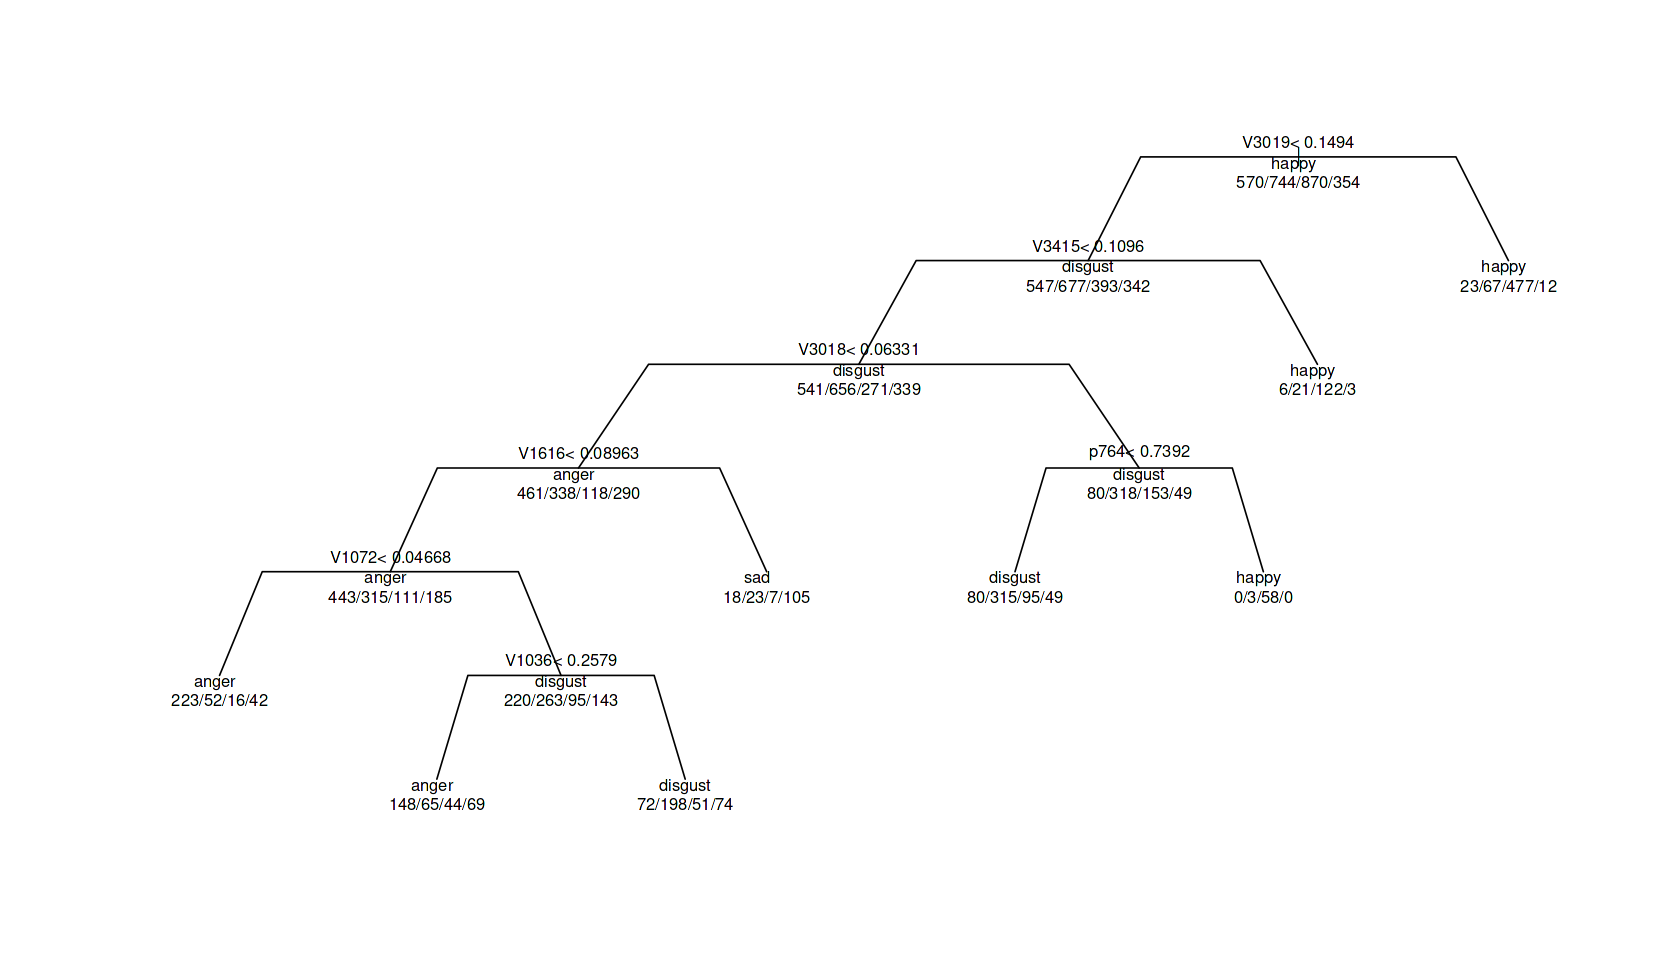

In [25]:
# Graphical visualization of the decision tree
options(repr.plot.width = 14, repr.plot.height = 8)
plot(fittree$final,
     compress = TRUE,
     uniform = TRUE,
     margin = 0.05,
     branch = .75)

text(fittree$final,
     cex = 0.8,
     all = TRUE,
     use.n = TRUE)

# Textual visualization of the decision tree
fittree$finalModel

## 4.2 Linear Discriminant Analysis with PCA (LDApca)<a class="anchor"  id="section4.2"></a>

Latent Discriminant Analysis (LDA) is a statistical technique used for dimensionality reduction and feature extraction. We think it could be used in the context of emotion recognition from facial images. In this application, the LDA tries to, based on the features we constructed, uncover the most discriminative facial features that capture the variations associated with different emotional expressions. Additionally, is possible that the computed features are all normally distributed within each classes, which is an assumption of this model. Furthermore, the classes could share a common covariance matrix, given mostly similar facial inputs (not too big variation picturewide, e.g.: high correlation between certain features). On the other hand, within-class variance equivalence might not true, adding this bias in high-dimensional is beneficial.

**Additionally, PCA has been used to lower the feature set, given RAM overloading effects of standard LDA (constant restart of kernel).**

In [26]:
suppressMessages(require(caret))

trControl <- trainControl('cv', 
                         number = 2, 
                         p = 0.8)

# Train a model with PCA
ldafit_with_pca <- train(x = train, 
                        y = y, 
                        method = "lda", 
                        preProcess = "pca",
                        trControl = trControl)
ldafit_with_pca

Linear Discriminant Analysis 

2538 samples
3761 predictors
   4 classes: 'anger', 'disgust', 'happy', 'sad' 

Pre-processing: principal component signal extraction (3761), centered
 (3761), scaled (3761) 
Resampling: Cross-Validated (2 fold) 
Summary of sample sizes: 1269, 1269 
Resampling results:

  Accuracy  Kappa    
  0.927502  0.9003342


## 4.3 Lasso-Fitted Multinomial Regression (LR) <a class="anchor"  id="section4,3"></a>

Lasso-fitted multinomial regression is a statistical modeling technique which we think could be used for predicting emotions since it is able to predict a categorical outcome such as happy. It does this based on a set of predictor variables we constructed. Lasso is typically used in high dimensional data, which this is, since it adds a penalty term to the model that encourages some of the regression coefficients to be exactly zero. This is a form of feature selection and it helps to prevent overfitting the model.


Call:  glmnet::cv.glmnet(x = as.matrix(train), y = factor(y), type.measure = "class",      nfolds = 5, family = "multinomial", alpha = 1, standardize = TRUE) 

Measure: Misclassification Error 

      Lambda Index Measure       SE Nonzero
min 0.002687    99 0.05556 0.005323     260
1se 0.003898    91 0.06068 0.005776     246

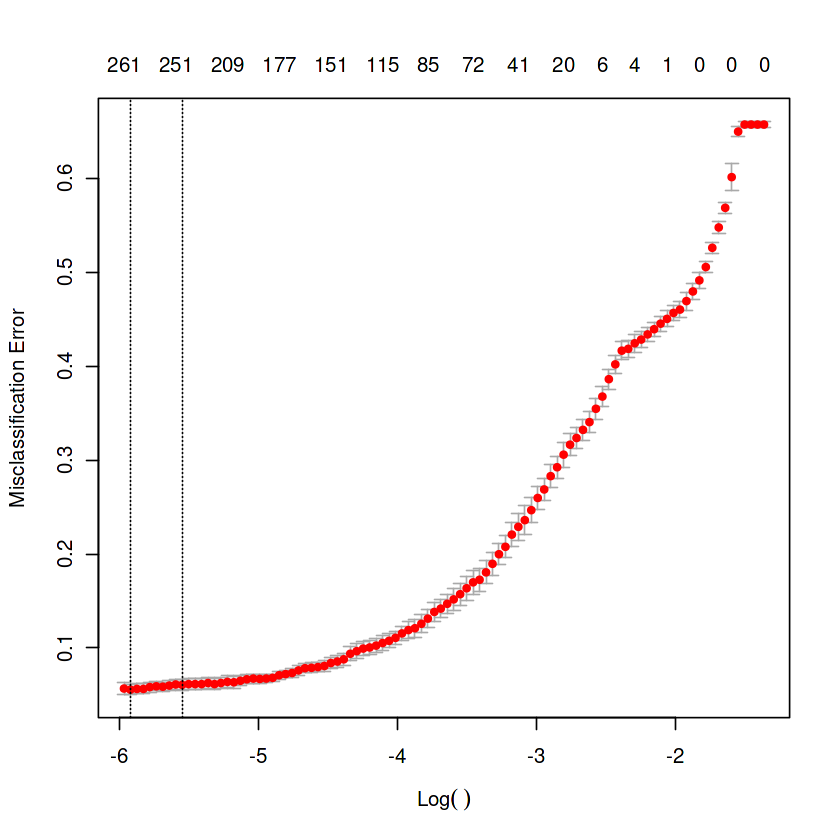

In [27]:
doMC::registerDoMC(cores = 4)

# Performing lasso regression
fit_lasso <- glmnet::cv.glmnet(as.matrix(train), 
                       factor(y), 
                       family = "multinomial",
                       nfolds = 5,
                       alpha = 1, 
                       type.measure = "class",
                       standardize = TRUE)
fit_lasso

options(repr.plot.width = 7, repr.plot.height = 7)

# Plot misclassicication rate over the log of Lambda 
plot(fit_lasso)

## 4.4 Ridge-Fitted Multinomial Regression (RR) <a class="anchor"  id="section4.4"></a>

Ridge-fitted multinomial regression is also a statistical technique used to predict categorical outcomes. Just like Lasso, it handles high dimensional data well but they differ in how they apply regularization and their effects on the regression model:
- Ridge penalizes large coefficients without necessarily setting any of them to zero
- Ridge typically keeps all the features in the model but shrinks their coefficients whereas lasso tends to produce sparse models (e.g. reducing the number of features used in the final model)
- Lasso is used when you expect a lot of irrelevant predictors and creates simpler models. Ridge if used when you want to adress the impact of multicollinearity which results in more stable models. 


Call:  glmnet::cv.glmnet(x = as.matrix(train), y = factor(y), type.measure = "class",      nfolds = 5, family = "multinomial", alpha = 0, standardize = TRUE) 

Measure: Misclassification Error 

    Lambda Index Measure       SE Nonzero
min  2.565   100 0.08511 0.004282    3761
1se  2.815    98 0.08708 0.003747    3761

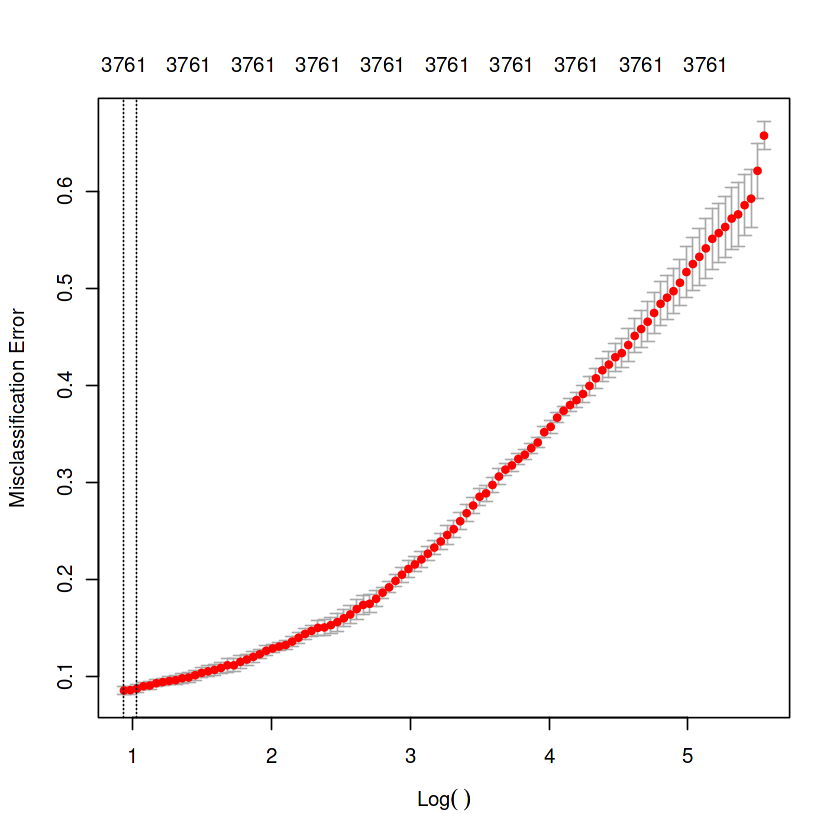

In [28]:
# Speed up tuning by using all 4 CPU cores
doMC::registerDoMC(cores = 4)

# Performing ridge regression
fit_ridge <- glmnet::cv.glmnet(as.matrix(train),
                       factor(y),
                       family = "multinomial",
                       nfolds = 5,
                       alpha = 0,
                       type.measure = "class",
                       standardize = TRUE)
fit_ridge

# Plot misclassification rate over the log of Lambda
plot(fit_ridge)

## 4.5 Random Forests (RF) <a class="anchor"  id="section4.5"></a>


Random Forest is a machine learning algorithm that we believe can also be used for emotion recognition from images. RF consists of multiple decision trees which each gets constructed independently based on a subset of the training data with replacement (bootstrapping) and a subset of the features (thus adressing overfitting). Each 'tree' in the forest provides its own prediction (emotion) and the final prediction is usually done with a 'majority vote'. 

One of the algorithms that can automatically learn non-linearities and interactions between pixels and emotion classes.

**This method has been dropped for now, due to its long running times.**

In [29]:
#doParallel::registerDoParallel(cores = 4)

#fit_rf <- train(x = train,
#                y = factor(y),
#                method = "rf",
#                trControl = trCntrl,
#                preProcess = c("center", "scale"),
#                tuneLength = 5)
#fit_rf

## 4.6 Support Vector Machines (SVMs) <a class="anchor"  id="section4.6"></a>

Support Vector Machines (SVMs) are  machine learning algorithms suitable which we think are suitable for emotion recognition from facial images. They work by training on a dataset of labeled face images, extracting relevant features, and determining an optimal decision boundary that separates different emotion categories. The advantage of SVMs is that they are flexible, using both linear and non-linear relationships between features and in this case emotions. They're also good in maximizing the margin between classes so that seperation is better. They require some tuning but when done correctly they can be good predictors and generalize well.

In [30]:
# Using caret
doParallel::registerDoParallel(cores = 4)
fit_svm_caret <- train(x = train,
                 y = factor(y),
                 method = "svmRadial",
                 trControl = trCntrl,
                 preProcess = c("center", "scale"),
                 tuneLength = 5)
fit_svm_caret

Support Vector Machines with Radial Basis Function Kernel 

2538 samples
3761 predictors
   4 classes: 'anger', 'disgust', 'happy', 'sad' 

Pre-processing: centered (3761), scaled (3761) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2031, 2030, 2031, 2030, 2030 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.8317702  0.7636939
  0.50  0.9145071  0.8814116
  1.00  0.9535107  0.9358685
  2.00  0.9720263  0.9614734
  4.00  0.9830577  0.9766711

Tuning parameter 'sigma' was held constant at a value of 0.0001519618
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.0001519618 and C = 4.

## 4.7 k-Nearest Neighbours (kNN) <a class="anchor"  id="section4.7"></a>

k-Nearest Neighbors (kNN) is a simple and flexible machine learning algorithm that we think could be used for emotion recognition based on images. It works by comparing the features extracted from the images with those of the 'k' nearest neighbors in the training data, assigning the emotion category most common among them to make predictions. k-NN is good at capturing patterns in facial expressions and doesn't assume a specific underlying model. This results in adaptability to non-linear feature-emotion relationships. The only hard part is selecting the right 'k' value, which is a crucial part of the model. Furthermore, the model only works properly if the features have high quality, which could be an issue with so many predictors.

In [31]:
fit_knn <-  train(x = train, y = factor(y), method='knn', trControl=trCntrl)
fit_knn

k-Nearest Neighbors 

2538 samples
3761 predictors
   4 classes: 'anger', 'disgust', 'happy', 'sad' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2031, 2030, 2031, 2030, 2030 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.5322998  0.3523683
  7  0.5334778  0.3490773
  9  0.5409759  0.3583678

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

# 5. Model Evaluations <a class="anchor"  id="section5"></a>

Here we will evaluate each of the models based on their predictions on the training set. This will allow us to select the best model for our submission to the test set. As accuracy is the measure our final model will be evaluated on it is of particular importance to us. However, as the values for accuracy of each model can be seen in the output above in this section we decided to delve deeper and look at the senstivity and the specificity of the models which are related to accuracy. Sensitivity is the probability of a prediction being identified as positive (here presence of a given emotion) given that it is positive. Meanwhile, specificity is the probability of a prediction being identified as negative (here the absence of a given emotion) given that it is negative.

## 5.1 Classification and Regression Trees (CART) <a class="anchor"  id="section5.1"></a>

We can see that the classification tree has a high or very high specificity on all classes. However, its sensitivity is worse and is particularly bad in the sad class where on,y 29.66% of sad faces were identified as such. Overall, we can say that this model did not perform that well even on the training set.

In [32]:
predtree = predict(fittree, train, type='raw') 
treeCon <- confusionMatrix(predtree, factor(y))

treeCon$table
treeCon$byClass[,1:2]

          Reference
Prediction anger disgust happy sad
   anger     371     117    60 111
   disgust   152     513   146 123
   happy      29      91   657  15
   sad        18      23     7 105

,Sensitivity,Specificity
Class: anger,0.6508772,0.8536585
Class: disgust,0.6895161,0.7653289
Class: happy,0.7551724,0.9190647
Class: sad,0.2966102,0.9780220


## 5.2 Linear Discriminant Analysis with PCA (LDApca) <a class="anchor"  id="section5.2"></a>

We can see that the LDA with PCA model performs very well with both sensitivity and specificity being very high for all classes. However, as we are currently evaluating the model performance on the test set we need to be way of overfitting which such values (especially the specificity of 1 for happiness) can be evidence of. Especially, since LDA has strong assumptions of a linear boundary between the classes it can produce very accurate predictions if this conditions are met on the training set but biased predictions if the assumptions are violated on the test set.

In [33]:
# Performance evaluation CV LDApca
pred_ldapca <- predict(ldafit_with_pca, train, type='raw')

# Assessing Accuracy in Confusion-Matrix
pred_ldapcaCon <- confusionMatrix(pred_ldapca, factor(y))

pred_ldapcaCon$table

pred_ldapcaCon$byClass[,1:2]

          Reference
Prediction anger disgust happy sad
   anger     558       9     1  16
   disgust     4     734     0   0
   happy       0       0   869   0
   sad         8       1     0 338

,Sensitivity,Specificity
Class: anger,0.9789474,0.9867886
Class: disgust,0.9865591,0.9977703
Class: happy,0.9988506,1.0000000
Class: sad,0.9548023,0.9958791


## 5.3 Lasso-Fitted Multinomial Regression (LR) <a class="anchor"  id="section5.3"></a>

Once again, the lasso-fitted multinomial regression model performs very well with  both sensitivity and specificity values being high for all classes. Similarly, to  the LDA with PCA model there could be signs of overfitting due to the presence of 1s in the sensitivity-specificity table. However, a lasso-fitted regression model is more variable and less biased than an LDA with PCA model and therefore should be able to adapt better also to the test set.

In [34]:
# Performance evaluation CV Lasso
pred_lasso <- predict(fit_lasso, 
                     as.matrix(train), 
                     s = 'lambda.min', 
                     type = 'class') %>% 
                     as.factor()

# Assessing Accuracy in Confusion-Matrix
conLasso <- caret::confusionMatrix(pred_lasso,factor(y))

conLasso$table

conLasso$byClass[,1:2]

          Reference
Prediction anger disgust happy sad
   anger     568       0     0   3
   disgust     1     744     0   0
   happy       0       0   870   0
   sad         1       0     0 351

,Sensitivity,Specificity
Class: anger,0.9964912,0.9984756
Class: disgust,1.0000000,0.9994426
Class: happy,1.0000000,1.0000000
Class: sad,0.9915254,0.9995421


## 5.4 Ridge-Fitted Multinomial Regression (RR) <a class="anchor"  id="section5.4"></a>
The values for ridge-fitted multinomial regression are lower than for the LDA with PCA and lasso-fitted multinomial regression models. However, they are still very high except for the sensitivity in the 'sad' class.

In [35]:
# Performance evaluation CV Ridge
pred_ridge = predict(fit_ridge, 
                     as.matrix(train), 
                     s = 'lambda.min', 
                     type = 'class') %>% 
as.factor()

# Assessing Accuracy in Confusion-Matrix
conRidge <- caret::confusionMatrix(pred_ridge,factor(y))

conRidge$table

conRidge$byClass[,1:2]

          Reference
Prediction anger disgust happy sad
   anger     534       7     4  54
   disgust    23     731     0  20
   happy       0       5   866   0
   sad        13       1     0 280

,Sensitivity,Specificity
Class: anger,0.9368421,0.9669715
Class: disgust,0.9825269,0.9760312
Class: happy,0.9954023,0.9970024
Class: sad,0.7909605,0.9935897


## 5.5 Support Vector Machines (SVMs) <a class="anchor"  id="section5.5"></a>
For the support vector machines the sensitivity and specificity values for all classes are also very high. Here we also get additional measures of performance including the balanced accuracy which is a mean of sensitivity and specificity accounting for imbalances in the classes being predicted. As our dataset is not very balanced this can be a helpful metric to consider. We can see that even on this metric the performance of the SVM remains very high.

In [36]:
## SVM Caret
# Calculate predictions
svmpred <- fit_svm_caret$pred[order(fit_svm_caret$pred$rowIndex), "pred"] %>% as.vector()

# Ensure that the factor levels for svmpred and y match
svmpred <- factor(svmpred, levels = levels(factor(y)))

# Compute confusion matrix
svmCon <- caret::confusionMatrix(svmpred, factor(y))

# View the confusion matrix
svmCon

Confusion Matrix and Statistics

          Reference
Prediction anger disgust happy sad
   anger     550       2     0  16
   disgust    11     739     1   1
   happy       0       1   869   0
   sad         9       2     0 337

Overall Statistics
                                          
               Accuracy : 0.9831          
                 95% CI : (0.9772, 0.9877)
    No Information Rate : 0.3428          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9767          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: anger Class: disgust Class: happy Class: sad
Sensitivity                0.9649         0.9933       0.9989     0.9520
Specificity                0.9909         0.9928       0.9994     0.9950
Pos Pred Value             0.9683         0.9827       0.9989     0.9684
Neg Pred Value             0.9898         0.9972  

## 5.6 k-Nearest Neighbors (kNN) <a class="anchor"  id="section5.6"></a>
For the k-Nearest Neighbors classifier the sensitivity and specificity values are considerably lower than for the few previous models. The balanced accuracy metric also reflects that. Therefore, we can say that overall this model does not perform as well as LDA with PCA, multinomial regression or SVMs.

In [37]:
# Calculate predictions
knn_pred <- fit_knn$pred[order(fit_knn$pred$rowIndex), "pred"] %>% as.vector()

# Ensure that the factor levels for svmpred and y match
knn_pred <- factor(knn_pred, levels = levels(factor(y)))

# Compute confusion matrix
knnCon <- caret::confusionMatrix(knn_pred, factor(y))

# View the confusion matrix
knnCon

Confusion Matrix and Statistics

          Reference
Prediction anger disgust happy sad
   anger     249     124    84  72
   disgust   163     438   156  93
   happy     101     151   596  99
   sad        57      31    34  90

Overall Statistics
                                          
               Accuracy : 0.541           
                 95% CI : (0.5214, 0.5605)
    No Information Rate : 0.3428          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3584          
                                          
 Mcnemar's Test P-Value : 2.057e-13       

Statistics by Class:

                     Class: anger Class: disgust Class: happy Class: sad
Sensitivity               0.43684         0.5887       0.6851    0.25424
Specificity               0.85772         0.7703       0.7896    0.94414
Pos Pred Value            0.47070         0.5153       0.6294    0.42453
Neg Pred Value            0.84022         0.8187  

# 6. Final Model Selection <a class="anchor"  id="section6"></a>

Here we select the best performing model on the basis of the above-calculated evaluations. For each model we derrived its accuracy based on a confusion matrix (also in the caret package). We've stored the accuracy of each model in a dataframe and using the which.max funciton we determined the model with the highest accuracy. Then we visualized the accuracies to get an easy overview of the models' performance.

The model with the highest accuarcy is Lasso with 0.9980299 .

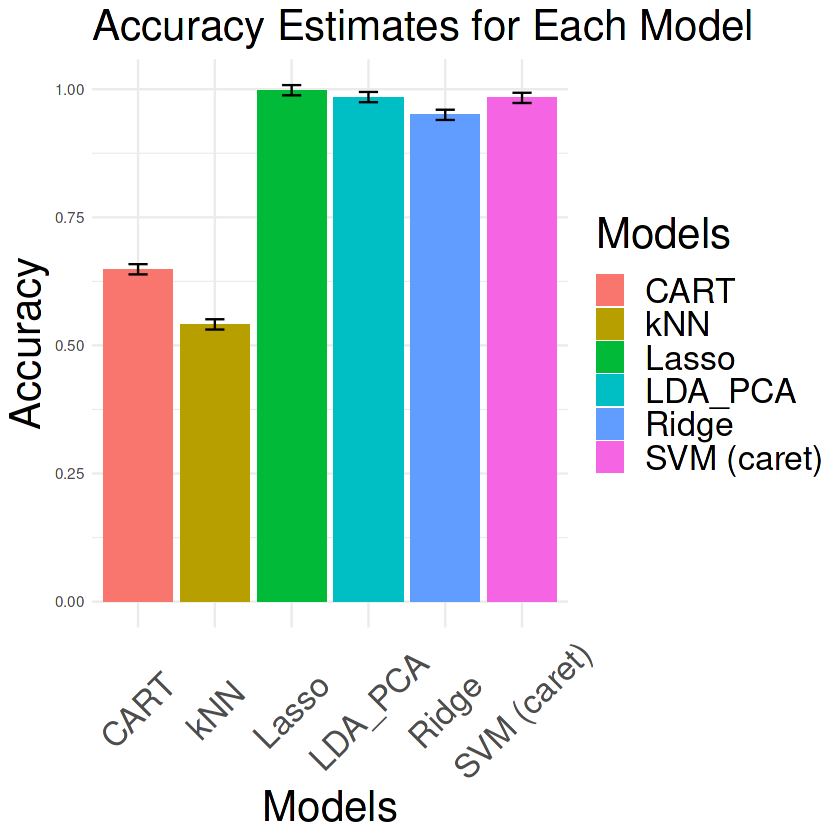

In [38]:
# Accuracy of models
Models <- c("CART", "LDA_PCA", "Lasso", "Ridge", "SVM (caret)", "kNN")
Accuracy <- as.numeric(c(treeCon$overall[1], pred_ldapcaCon$overall[1],
                         conLasso$overall[1], conRidge$overall[1],
                         svmCon$overall[1], knnCon$overall[1]))

# Create a data frame for plotting
model_data <- data.frame(Models, Accuracy, upper = Accuracy + 0.01, lower = Accuracy - 0.01)

# Find the index of the highest accuracy model
max_acc_index <- which.max(Accuracy)

# Create a label color vector
label_colors <- rep("black", length(Models))
label_colors[max_acc_index] <- "red"

# Plot the data
ggplot(model_data, aes(x = Models, y = Accuracy, fill = Models, label = Models)) +
  geom_col() +
  geom_errorbar(aes(ymax = upper, ymin = lower), width = 0.25) +
  scale_x_discrete(labels = Models, breaks = Models) +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 20, angle = 45, vjust = 0.5), 
        axis.title = element_text(size = 25),
        plot.title = element_text(size = 25), 
        legend.text = element_text(size = 20),
        legend.title = element_text(size = 25) ) +
  labs(title = "Accuracy Estimates for Each Model", color = label_colors)

# Find the index of the highest accuracy model
max_acc_index <- which.max(Accuracy)
max_model <- Models[max_acc_index]
max_accuracy <- Accuracy[max_acc_index]

# Print the line of text
cat("The model with the highest accuarcy is", max_model, "with", max_accuracy,".")

Although the lasso-fitted regression model has been selected as the best-performing one on the training set we have selected the SVM as our model of choice. This is because:

* SVMs can **effectively handle non-linear relationships** by using various kernel functions (e.g.: radial basis function (RBF) kernels). This flexibility can be crucial for capturing complex patterns in the data that a linear regression model could miss.

* SVMs are **less sensitive to outliers** compared to linear regression models. They prioritize finding a decision boundary that maximizes the margin between classes, which reduces the impact of outliers.

* SVMs tend to have **good generalization performance**, which is crucial for predicting on unseen data. This is especially important if the training set is not entirely representative of the population or if data distribution changes over time.

* SVMs offer **various hyperparameters**, such as the choice of kernel, regularization strength (C), and the kernel parameters. With proper hyperparameter tuning, SVMs can be customized to suit the specific needs of the problem, potentially outperforming a lasso-fitted regression model.

* SVMs often result in **sparser models**, meaning they select a subset of the most informative features for decision making. This can lead to better interpretability and reduced overfitting, especially when dealing with high-dimensional data (like this one).

Overall, while the lasso-fitted regression model may perform slightly better on the training set, the SVM's ability to handle non-linearity, outliers, and its generalization capabilities, along with its suitability for our specific problem, make it our model of choice for this application.

We now store our selected model - the SVM - in a variable to facilitate easier prediction on the test set:

In [39]:
# Selecting SVM as the best performing model
best_model <- fit_svm_caret

## 6.1 Formatting Your Submission File <a class="anchor"  id="section6.1"></a>

Finally, we create the submission file with our predictions on the test set using the best performing model on the training set, in this case the lasso-fitted multinomial regression.

In [40]:
## Make predictions
predtree <- predict(best_model, as.matrix(test), s = 'lambda.min') %>% as.factor()

## Write to file
tibble(file = rownames(test), category = predtree) %>% 
    write_csv(path = "submission.csv")

## Check result
cat(readLines("submission.csv",n=20), sep="\n")

Warning message:
“The `path` argument of `write_csv()` is deprecated as of readr 1.4.0.
ℹ Please use the `file` argument instead.”


file,category
S010_004_00000017a.png,anger
S010_004_00000017b.png,anger
S010_004_00000017c.png,anger
S010_004_00000017d.png,anger
S010_004_00000017e.png,anger
S010_004_00000017f.png,anger
S011_002_00000022a.png,sad
S011_002_00000022b.png,sad
S011_002_00000022c.png,sad
S011_002_00000022d.png,sad
S011_002_00000022e.png,sad
S011_002_00000022f.png,sad
S011_005_00000018a.png,disgust
S011_005_00000018b.png,disgust
S011_005_00000018c.png,disgust
S011_005_00000018d.png,disgust
S011_005_00000018e.png,disgust
S011_005_00000018f.png,disgust
S011_006_00000013a.png,happy


**Conclusions**

Our goal was to find a model that the most accurately recognizes one of four emotions - anger, disgust, hapiness or sadness - from photos of people's faces. This was judged not just on our avaiable data, but later will be tested on a test set, therefore we have adjusted the choice of our model from the best performing one on the training set, considering generalizability to new environments.

Overall, this algorithm has performed better than humans generally do so on these four emotions. Therefore, our "hypothesis" was satisfied and this case the machine actually performed better than humans do. As of improvements, this algorithm should be trained and tested on a larger and more diverse sample as well as to incriese the number of classes in this multi-class classification problem. On the other hand, multi-label classification (the output can take up multiple classes at once) should be tried as well, given that humans convey multiple emotions at once (e.g.: ambivalent emotions).

# 7. Contributions <a class="anchor"  id="section7"></a>

* **Rebeka Prívozníková**: Features, data cleaning, texts + notebook formatting

* **Bram Le Febre**: Features, descriptions of features/models

* **Bence Marosi**: Models, data considerations, features, text editing, model evaluations

# References
* dan_vdmeer, Dave Leitritz, Raoul. (2023). Facial Expressions BDA 2023. Kaggle. https://kaggle.com/competitions/bda-2023-facial-expressions

* Grasman, R. (2018). Feature extraction from Signals. Dropbox Paper. Retrieved September 21, 2023, from https://paper.dropbox.com/doc/Feature-extraction-from-Signals-qCp5uvj47gmyuw5nmB8lL

* Mollahosseini, A., Abdollahi, H., Sweeny, T. D., Cole, R. A., & Mahoor, M. H. (n.d.). Role of embodiment and presence in human perception of robots’ facial cues. International Journal of Human-Computer Studies, 116, 25–39. https://doi.org/10.1016/j.ijhcs.2018.04.005

* P. Lucey, J. F. Cohn, T. Kanade, J. Saragih, Z. Ambadar and I. Matthews (2010). The Extended Cohn-Kanade Dataset (CK+): A complete dataset for action unit and emotion-specified expression. IEEE Computer Society Conference on Computer Vision and Pattern Recognition - Workshops, San Francisco, CA, 2010, pp. 94-101, doi: 10.1109/CVPRW.2010.5543262.